# Terrorism in India - Analysis

India is home to 1.324 billion (2016) people which means 404 (people per km2), which indicates that small terror incident can claim a lot of lives in India. Thus, appropriate tools for counterterrorism should be analyzed. A common definition of terrorism is the systematic use or threatened use of violence to intimidate a population or government for political, religious, or ideological goals.  India is the third largest country which is affected by terrorism in the world. The dataset contains 10978 recorded entry in India. The aim of this notebook is to explore the dataset using data visualization techniques in order to find any possible solution which may help to prevent such type of incident in future. Feel free to suggest any changes or contribute via [GitHub](https://github.com/hell-sing).


*  Data Preprocessing   
*  General Observations    
*  Terrorist Attacks by Year    
*  Attacking Methods by Terrorists    
*  Terrorist Attacks by Target    
*  Movement of Terror Group   

###  Data Preprocessing

In [1]:
#importing required libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as anime
import warnings
from mpl_toolkits.basemap import Basemap

if False: #work only in python 3.5
    from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

In [2]:
data = pd.read_csv("./Indiaterrorismdb2016.csv")
row, column =  data.shape
print("Dataset contains {} rows and {} columns.".format(row,column))

Dataset contains 10978 rows and 47 columns.


In [3]:
data = data.sort_values(['year','state'],ascending=[1,1])

In [4]:
print("Usefulness % of a column in the dataset :")
round(((row - data.isnull().sum()) / row) * 100 , 2);

Usefulness % of a column in the dataset :


Since all of the data belong to real incidents and contain nonnumeric values, finding usefulness in percentages can help us to identify which fields should be used for analysis. Field with a lot of empty values does not provide much information about trends over time, with some exceptions. 

In [5]:
data = data.drop(['terrorgroupdetail','location','summary','attacktype2','attacktype3','targetdetail1',
                  'targetdetail2','targetdetail3','targetdetail4','targetdetail5','targetdetail6','targetdetail7',
                  'noofattackerscaptured','weapsubtype1', 'weaptype2', 'weapsubtype2', 'weaptype3','weapsubtype3',
                  'weapdetail','noofattackerskilled','noofattackerswounded','propertydamaged','propertycomment',
                  'hostageskidnapped','hostagekepthours', 'ransomdemanded', 'fateofhostages',
                  'noofhostagesreleased'],axis=1)
data.shape

(10978, 19)

In [6]:
data.columns = ['Year', 'Month', 'Day', 'Foreign_Attackers', 'Terror_Group','State','City','Latitude',
                'Longitude','Inside_Outside_City','Attack_Success','Suicide_Mission','Attack_Type',
                'Target_Type', 'Attack_Motive','No_of_Attackers', 'Weapon_Type','Victims_Killed','Victims_Wounded']

In [7]:
data['Victims_Killed'] = data['Victims_Killed'].fillna(0).astype(int)
data['Victims_Wounded'] = data['Victims_Wounded'].fillna(0).astype(int)
data['Victims'] = data['Victims_Killed'] + data['Victims_Wounded']

### General Observations

In [8]:
print("Year with maximum number of attacks in India is {}.".format(data['Year'].max()))
print("Maximum number of incident took place in {} with {} attacks in total 45 years.".format(data['State'].value_counts().index[0],data['State'].value_counts().values[0]))
print("Most naturious group is {} which shown there activity {} times.".format(data['Terror_Group'].value_counts().index[0],data['Terror_Group'].value_counts().values[0]))
print("Attackers favorite spot is {} which is mostly targeted by {}.".format(data['City'].value_counts().index[0],'Hizbul Mujahideen (HM)'))

Year with maximum number of attacks in India is 2016.
Maximum number of incident took place in Jammu and Kashmir with 2197 attacks in total 45 years.
Most naturious group is Communist Party of India - Maoist (CPI-Maoist) which shown there activity 1765 times.
Attackers favorite spot is Srinagar which is mostly targeted by Hizbul Mujahideen (HM).


### Terrorist Attacks by Year

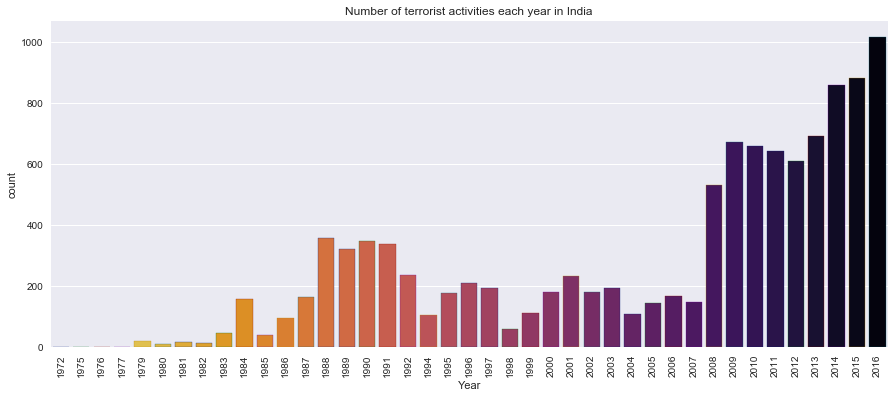

In [9]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=data, palette='inferno_r',edgecolor=sns.color_palette('dark',7))
plt.title('Number of terrorist activities each year in India')
plt.xticks(rotation=90)
plt.show()

India’s battle with terrorism has been a long and hard one. A country with the complex socio-economic situation, terrorism has plagued the country since Independence. Above plot clearly shows that terrorism is always an issue in India and continuously rising in India. In last 8 years, we have seen a high growth in terrorist activity, which is much much greater than previous activities. India needs strong and reliable methods to deal with rising terrorism in India.

### Attacking Methods by Terrorists

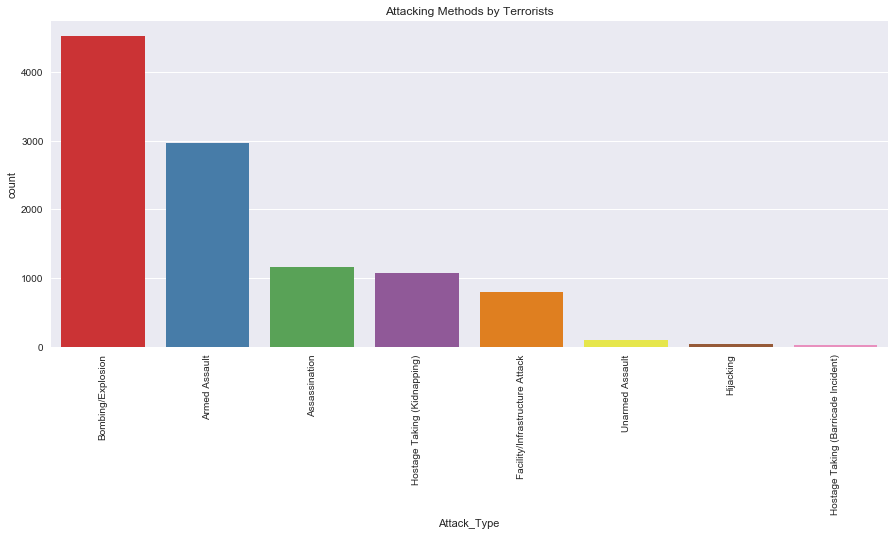

In [10]:
plt.subplots(figsize=(15,6))
sns.countplot('Attack_Type',data=data, palette='Set1', order= data['Attack_Type'].value_counts().index)
plt.title('Attacking Methods by Terrorists')
plt.xticks(rotation=90)
plt.show()

From the plot we can clearly see that **Bombing/Explosion**, **Armed Assault** and **Assassination** are the top three attacking methods used by Terrorists. In which is Bombing/Explosion is most used methods by Terrorist, as Bombing and Explosion are weapons of mass killing. Let us confirm that using data.

In [11]:
print(round(data.groupby('Attack_Type').Victims.count()/data.groupby('Attack_Type').Victims.count().sum()*100,2))

Attack_Type
Armed Assault                          27.74
Assassination                          10.85
Bombing/Explosion                      42.30
Facility/Infrastructure Attack          7.43
Hijacking                               0.35
Hostage Taking (Barricade Incident)     0.26
Hostage Taking (Kidnapping)            10.07
Unarmed Assault                         1.00
Name: Victims, dtype: float64


Indeed, it is true 42 % of all victims are due to Bombing and Explossion.

### Terrorist Attacks based on Terror Group

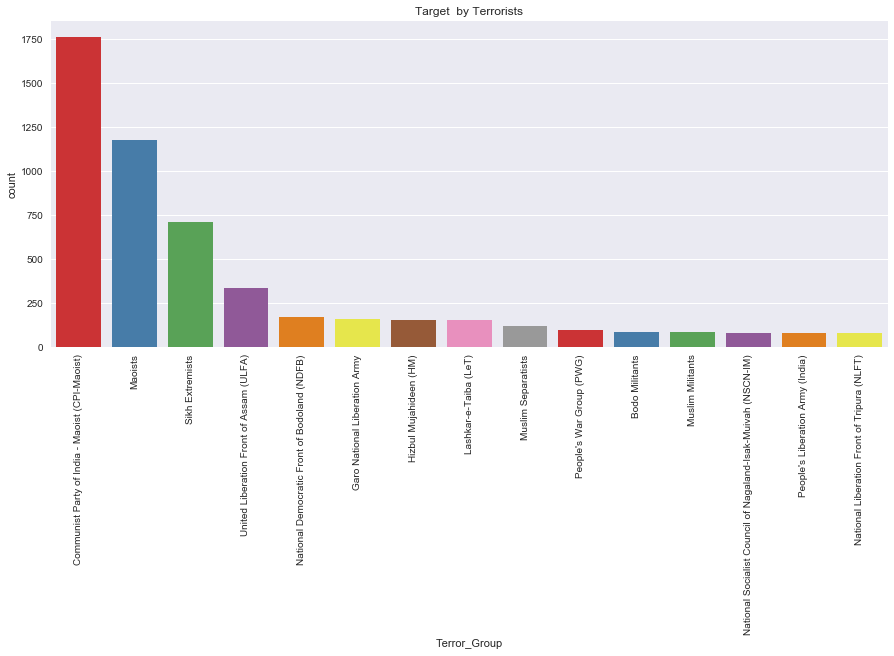

In [12]:
plt.subplots(figsize=(15,6))
sns.countplot('Terror_Group',data=data, palette='Set1', order= data['Terror_Group'].value_counts().index[:15])
plt.xticks(rotation=90)
plt.title('Target  by Terrorists')
plt.show()

In [13]:
top_terror_group = data[data.Terror_Group.isin(data['Terror_Group'].value_counts().index[:10])]

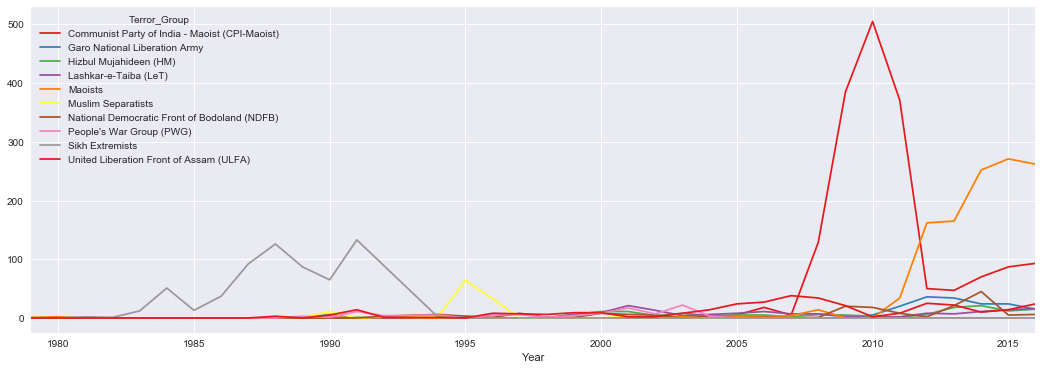

In [14]:
terror_region=pd.crosstab(top_terror_group.Year,top_terror_group.Terror_Group)
terror_region.plot(color=sns.color_palette('Set1',18))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

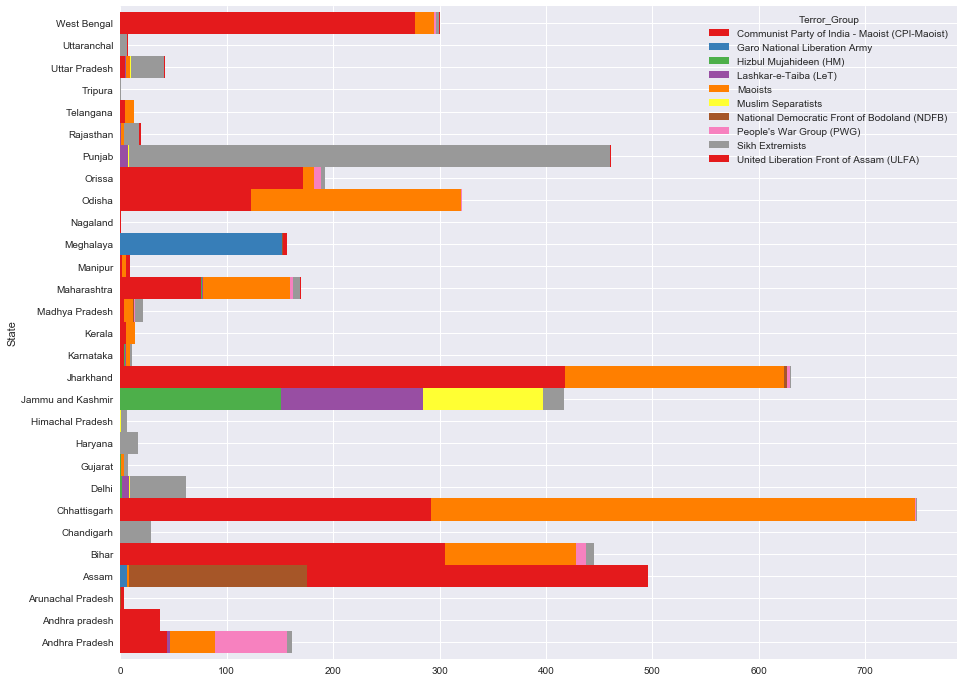

In [15]:
pd.crosstab(top_terror_group.State,top_terror_group.Terror_Group).plot.barh(stacked=True,width=1,color=sns.color_palette('Set1',9))
figure = plt.gcf()
figure.set_size_inches(15,12)
plt.show()

Poverty and less job 

### Terrorist Attacks based on States

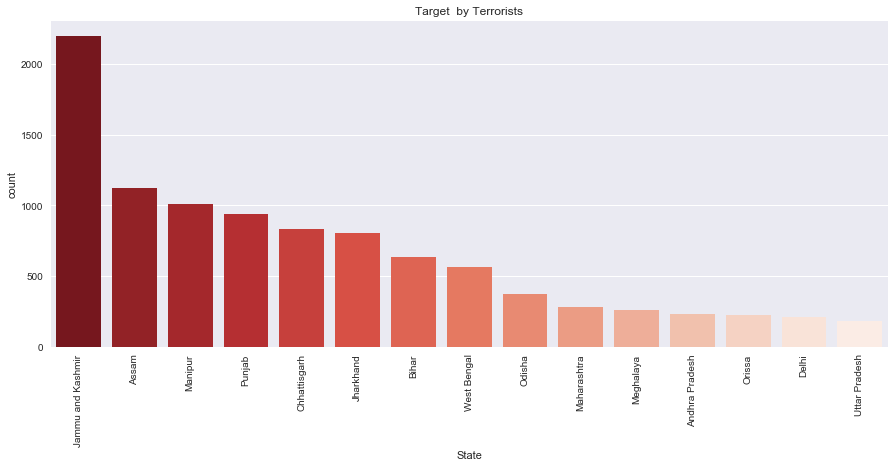

In [16]:
plt.subplots(figsize=(15,6))
sns.countplot('State',data=data, palette='Reds_r', order= data['State'].value_counts().index[:15])
plt.xticks(rotation=90)
plt.title('Target  by Terrorists')
plt.show()

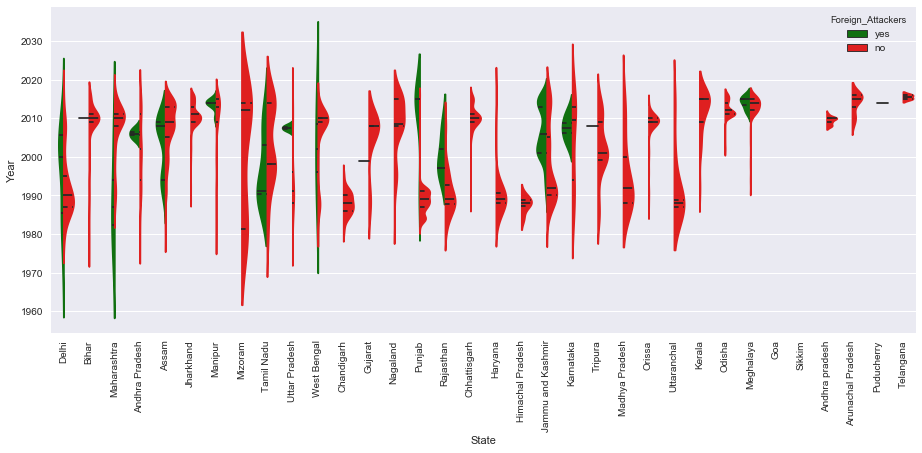

In [17]:
sns.violinplot(x="State", y="Year", hue="Foreign_Attackers", data=data, 
               split=True, inner="quart", palette={"yes": "g", "no": "r"})
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(15.5,6)

### Terrorist Attacks by Target Type

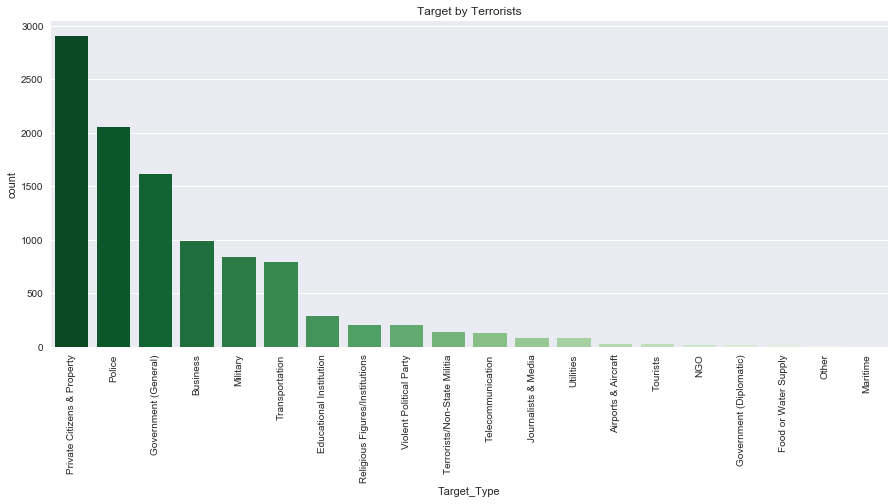

In [18]:
plt.subplots(figsize=(15,6))
sns.countplot('Target_Type',data=data, palette='Greens_r', order= data['Target_Type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Target by Terrorists')
plt.show()